# 梯度上升

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100, size=100)
X[:, 1] = 0.75*X[:, 0] + 3 + np.random.normal(0, 10, size=100)

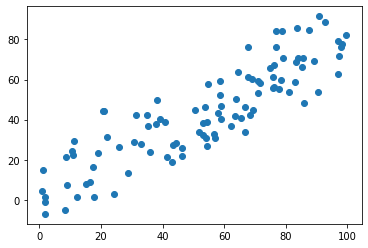

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

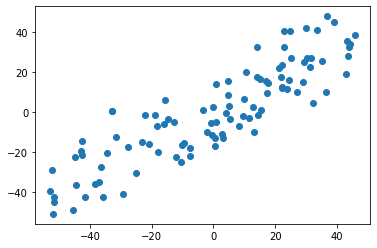

In [6]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [7]:
np.mean(X_demean[:, 0])

-1.8616219676914626e-14

# 梯度上升方法

In [8]:
def f(w, X):
    return np.sum(X.dot(w)**2)/len(X)

In [9]:
def df_math(w, X):
    return X.T.dot(X.dot(w))*2./len(X)

In [10]:
def dJ_debug(theta, X, epsilon = 0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        w1 = theta.copy()
        w1[i] += epsilon
        w2 = theta.copy()
        w2[i] -= epsilon
        res[i] = (f(w1, X)-f(w2, X))/(2*epsilon)
    return res

In [15]:
def direction(w):
    return w/np.linalg.norm(w) #只返回方向

In [11]:
def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w= w
        w = w + eta*gradient
         w = direction(w)
        if (abs(f(w, X)-f(last_w, X)) < epsilon):
            break
        cur_iter +=1
    return w

In [12]:
initial_w =  np.random.random(X.shape[1])
initial_w

array([0.9219247 , 0.62964468])

In [13]:
eta = 0.001

In [14]:
gradient_ascent(dJ_debug,X_demean, initial_w,eta)

array([5.44781673e+14, 5.39189175e+14])